In [5]:
options center ps=60 ls=72;
dm'log;clear;out;clear;';
/*https://blogs.sas.com/content/sasdummy/2013/07/02/use-dlcreatedir-to-create-folders/*/
options dlcreatedir;
libname in '/folders/myfolders/STAT7500_Statistical_Programming/HW4/in';
libname out '/folders/myfolders/STAT7500_Statistical_Programming/HW4/out';

/*
proc copy inlib=in outlib=out noclone datecopy;
run;
*/

## 1. Determine the effect of changing lambda in a Poisson distribution.  

### a. Generate 1000 observations from a Poisson distribution with parameter lambda = 3. Plot the data using a histogram. 
### b. Generate 1000 observations from a Poisson distribution with parameter lamba = 8 and plot the data using a histogram.  

In [6]:
/* https://support.sas.com/content/dam/SAS/support/en/books/simulating-data-with-sas/65378_excerpt.pdf */
%macro getPoisson(lambda);
%let NObs = 1000;
%let seed = 1234;
    call streaminit(&seed);
    do i = 1 to &NObs;
        lambda = &lambda;
        x = rand("Poisson", &lambda);
        output;
    end;

%mend getPoisson;


In [7]:
data out.myData(drop = i);
    %getPoisson(3);
    %getPoisson(8);
run;


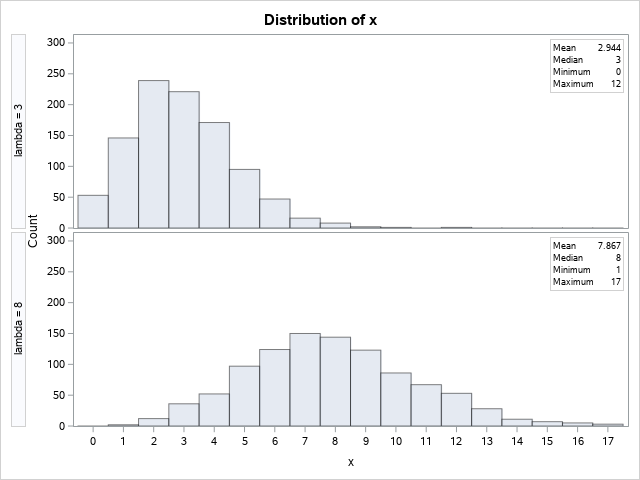

In [8]:
proc univariate data = out.myData noprint;
 class lambda;
 title 'poisson distribution';
 histogram x / midpoints = 0 to 1 by 1 vscale=count;
 inset mean median min max/pos=ne;
run;

### C. What is the effect of increasing lambda in a Poisson distribution?

#### As lambda increases, the poisson distribution gets closer to a normal distribution.

## 2. Determine the effect of changing alpha and beta in a gamma distribution.  Generate 1000 observations for each of the following gamma distributions:

### a. A gamma distribution with alpha = 3 and beta = 2
### b. A gamma distribution with alpha = 10 and beta = 2
### c. A gamma distribution with alpha = 3 and beta = 10

### What is the effect of increasing alpha? What is the effect of increasing beta?

In [9]:
/* https://support.sas.com/content/dam/SAS/support/en/books/simulating-data-with-sas/65378_excerpt.pdf */
%macro getGamma(alpha, beta);
    data out.myData2(drop = i);
        %let NObs = 1000;
        %let seed = 1234;

        call streaminit(&seed);
        do i = 1 to &NObs;
            x = &beta*rand("Gamma", &alpha);
            output;
        end;
   run;
   
   proc univariate data = out.myData2;
     ods select histogram;
     title 'gamma distribution: alpha = '&alpha 'beta = '&beta ;
     histogram/ gamma;
     inset gamma/pos=ne; 
   run;
     
%mend getGamma;


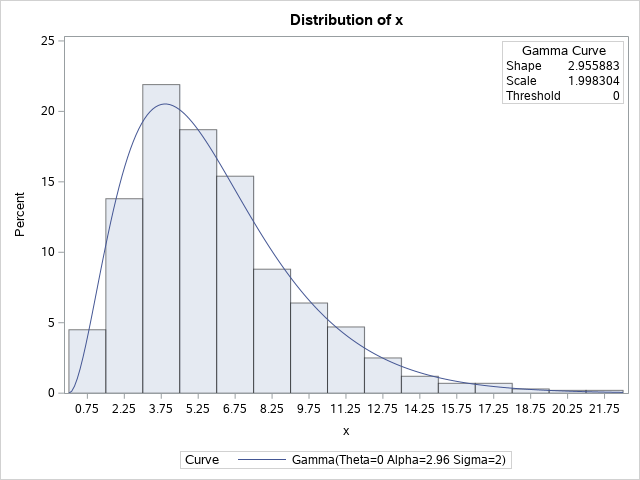
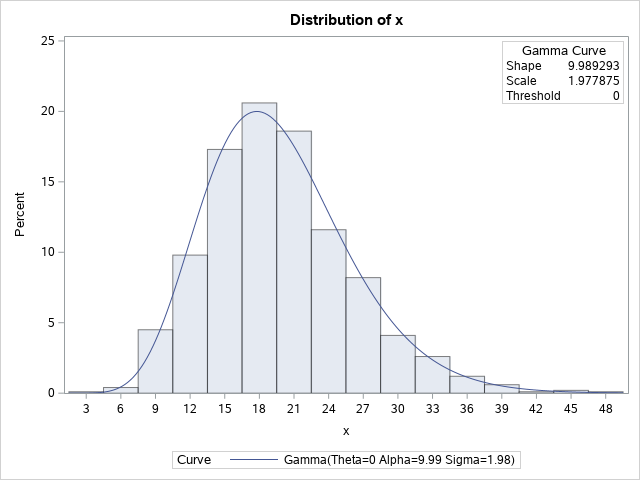
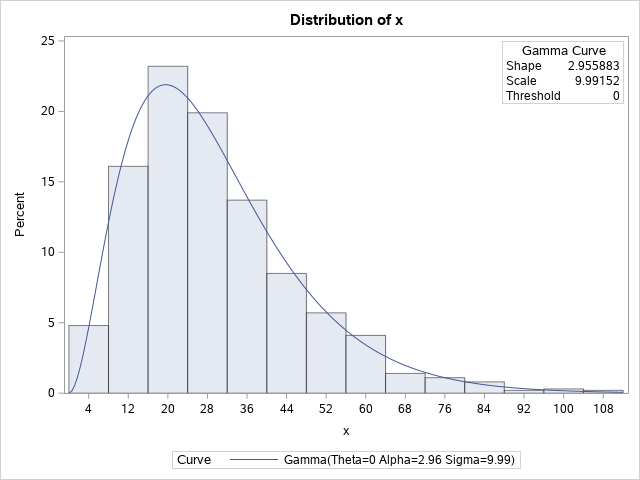

In [10]:
    
    %getGamma(3,2);
    %getGamma(10,2);
    %getGamma(3,10);


### What is the effect of increasing alpha? What is the effect of increasing beta?


#### If alpha remains the same and beta increases, the curve gets wider. If beta remains the same and alpha increases, the graph shifts to the right and gets closer to a normal distribution. 

## 3. Generate 1000 samples of 5 observations each from the following distributions to test the hypotheses:

	  Ho: µ=20
      Ha: µ>20

    N(21, 4)
    N(22, 4)
    N(23, 4)

Discuss what happens to power as the population mean moves from 21 to 22 to 23.

In [125]:
%macro getNormal(mean, std, num);
    data out.qn3_&num(keep = i value);
        %let NObs = 1000;
        %let variance = %eval(&std*&std);
        
        do i = 1 to &NObs;
            call streaminit(1);
            obs1 = rand("Normal", &mean, &std);
            
            call streaminit(2);
            obs2 = rand("Normal", &mean, &std);
            
            call streaminit(3);
            obs3 = rand("Normal", &mean, &std);
            
            call streaminit(4);
            obs4 = rand("Normal", &mean, &std);
            
            call streaminit(5);
            obs5 = rand("Normal", &mean, &std);
            
            value = (obs1 + obs2 + obs3 + obs4 + obs5)/5;
            
            output;
        end;
      
        
   run;
    
    proc ttest data=out.qn3_&num H0=20 alpha = 0.025 sides = 2;
        var value;        
    run;

%mend getNormal;


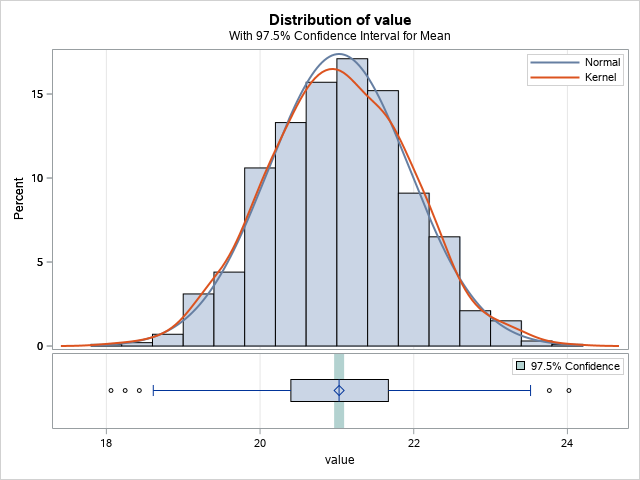
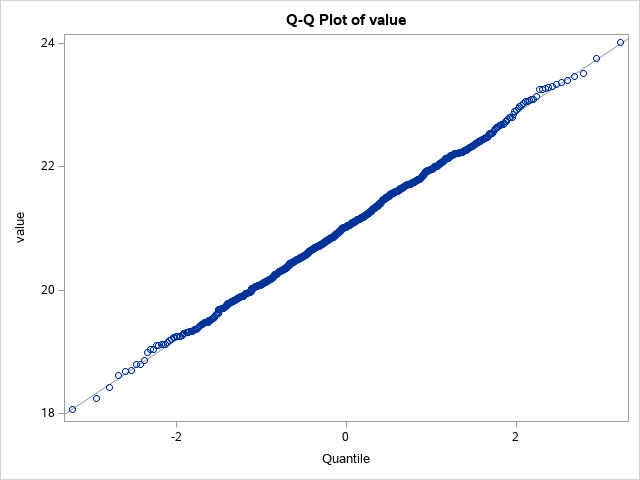

In [127]:
%getNormal(21,2,1);



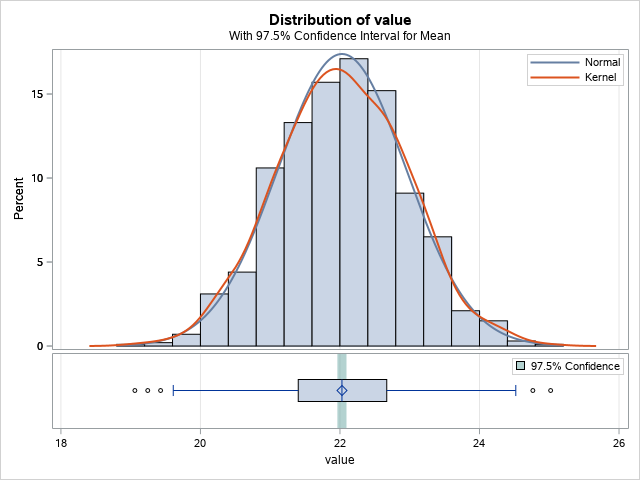
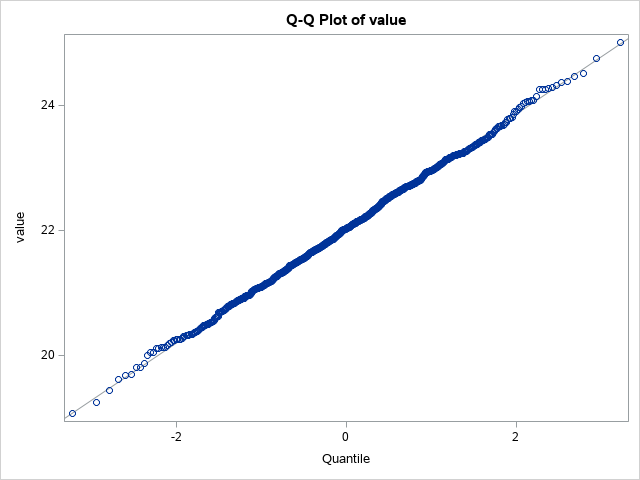

In [128]:
%getNormal(22,2,2);


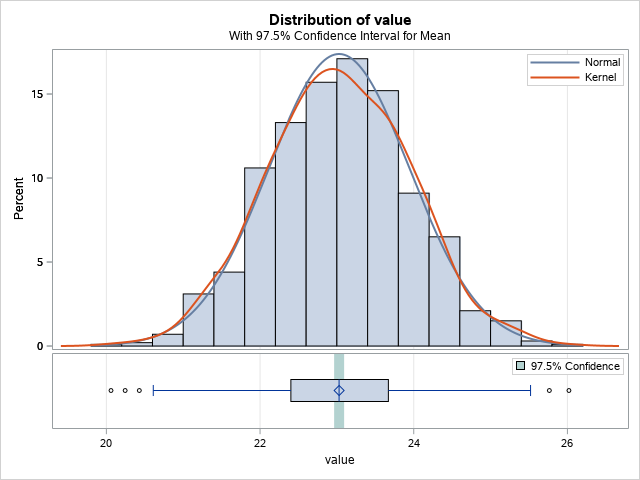
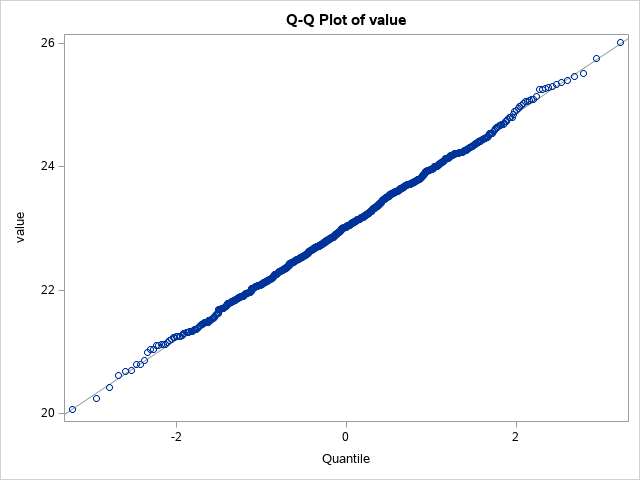

In [129]:

%getNormal(23,2,3);

In [130]:
proc power; 
  onesamplemeans test=t
  nullmean = 20
  mean = 21 22 23 
  stddev = 2
  ntotal = 1000
  sides = 2
  alpha = 0.025
  power = .;
run;

### Discuss what happens to power as the population mean moves from 21 to 22 to 23.

#### The power stays the same at greater than 0.999 as mean grows from 21 to 22 and then to 23.

When mean is 21, the 97.5% CL Mean is (20.9635,21.0938).
When mean is 22, the 97.5% CL Mean is (21.9635,22.0938).
When mean is 23, the 97.5% CL Mean is (22.9635,23.0938).
As we can see in the graph below, as the value of mean increases from 21 to 22, and then to 23, the histogram gets
farther and farther from our null hypothesis mean = 20. Type II error (beta) decreases as the histogram moves away
our null hypothesis. Power (1-beta) increases as the probability of making a Type II error decreases. As the difference
between the sample mean and the null mean grows, we are more likely to making a correct decision to reject the null
hypothesis.


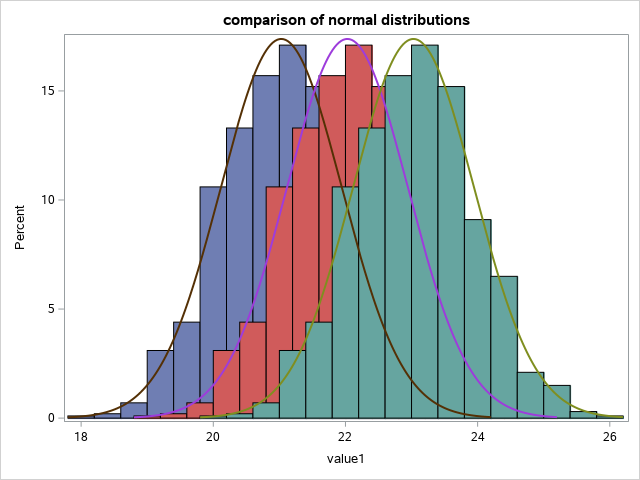

In [146]:
proc sgplot data=out.merged_qn3 noautolegend;
 title 'comparison of normal distributions';
  histogram value1;
  histogram value2;
  histogram value3;
  density value1;
  density value2;
  density value3;

run;